In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pandas as pd

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import pyproj
from pyproj import Proj, transform
from dms2dec.dms_convert import dms2dec

import rasterio as rio
from rasterio.plot import show
from rasterio.windows import Window, from_bounds
from IPython.core.display import display
import geopandas as gpd

In [15]:
dataset = rio.open("Data/TIFFiles/DHMVIIDSMRAS1m_k13.tif")
print(dataset.shape)
print(dataset.crs)

(20000, 32000)
EPSG:31370


(50, 50)


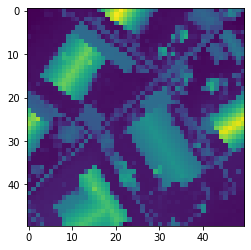

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,12.69,12.68,12.71,12.79,12.98,12.91,12.90,13.10,14.59,13.00,...,15.58,15.27,15.06,12.95,14.97,14.18,16.840000,15.940000,16.08,14.88
1,12.68,12.72,12.75,12.78,13.15,13.14,12.90,12.94,14.63,13.86,...,15.69,15.52,15.32,15.14,14.52,15.49,16.629999,16.360001,14.80,12.74
2,12.70,12.74,12.78,12.81,12.84,12.91,12.92,12.95,12.98,13.02,...,15.54,15.66,15.70,15.41,14.47,14.16,14.080000,14.420000,12.74,12.75
3,12.70,12.77,12.80,12.83,12.87,12.89,12.96,12.98,13.01,13.06,...,15.28,15.50,15.59,15.20,15.11,12.92,12.880000,12.760000,12.76,12.78
4,12.74,12.88,12.93,12.86,12.91,12.93,12.97,13.00,13.05,13.07,...,14.88,15.30,14.74,14.77,14.66,12.91,12.900000,12.920000,12.82,12.91


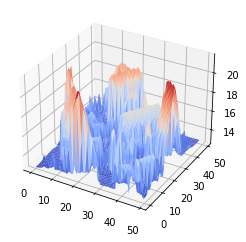

In [16]:
### window technique -> random buildings, not very controlable
w = dataset.read(1, window=Window(50, 15000, 50, 50))
print(w.shape)
show(w)

pandas_w = pd.DataFrame(data=w)
display(pandas_w.head())

# first try for 3D plot using matplotlib and the pandas dataframe created with the window
fig = plt.figure()
ax = fig.gca(projection='3d')

x = pandas_w.columns
y = pandas_w.index
x, y = np.meshgrid(x, y)
z = pandas_w
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

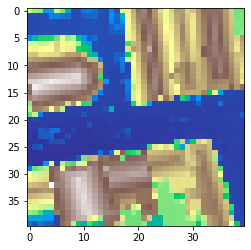

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,15.90,15.01,14.73,10.31,10.58,15.63,14.31,10.80,8.23,8.22,...,18.500000,19.580000,20.719999,21.879999,21.879999,20.709999,19.420000,18.150000,14.15,14.18
1,8.11,8.12,8.13,8.14,9.53,9.59,9.18,9.05,8.19,8.20,...,17.510000,19.440001,20.590000,21.760000,22.059999,20.830000,19.570000,18.280001,14.18,14.44
2,8.07,8.06,8.09,8.09,8.33,8.11,8.14,8.11,8.14,8.17,...,17.299999,19.299999,20.490000,21.629999,22.180000,20.940001,19.629999,18.360001,14.50,14.38
3,8.05,8.07,8.08,8.11,8.13,8.16,8.16,8.18,8.20,8.21,...,17.309999,19.240000,20.290001,21.500000,22.350000,21.080000,19.840000,18.510000,14.36,14.35
4,8.09,8.13,8.15,8.15,8.18,8.20,8.22,8.23,8.23,8.24,...,17.370001,19.120001,20.230000,21.350000,22.450001,21.219999,19.879999,18.610001,14.27,14.62


(40, 40)

<class 'plotly.graph_objs._figure.Figure'>


In [17]:
### from bounds technique -> Bruges
## https://epsg.io/map#srs=31370&x=70190.92&y=212195.57&z=11&layer=streets => coordinates of Bruges
x = 70151.53
y = 211680.21
left = x - 20.0
bottom = y - 20.0
right = x + 20.0
top = y + 20.0

#from_bounds -> works with coordinates in espg31370
brugge = dataset.read(1, window=from_bounds(left, bottom, right, top, dataset.transform))
rio.plot.show(brugge, cmap = 'terrain')
brugge_df = pd.DataFrame(data=brugge)
display(brugge_df.head())
display(brugge_df.shape)

#first try to plot 3D data with plotly
fig = go.Figure(data=[go.Surface(z=brugge_df.values)])
fig.update_layout(title='3D plot Bruges', autosize=True)
fig.show()
print(type(fig))

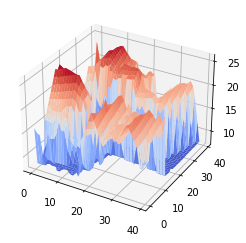

In [18]:
# first try for 3D plot using matplotlib and the pandas dataframe created with the window
fig = plt.figure()
ax = fig.gca(projection='3d')

x = brugge_df.columns
y = brugge_df.index
x, y = np.meshgrid(x, y)
z = brugge_df
surface = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)



In [19]:
### TODO
# Function to convert normal coordinates to ESPG31370
transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:31370')
print(dms2dec('''36°44'47.69"N'''))



36.74658055555555
